# M2177.003100 Deep Learning Term Project <br> Part 1. Prompt Engineering for Text-to-Image Generation

---

Copyright (C) Data Science & AI Laboratory, Seoul National University. This material is for educational uses only. Some contents are based on the material provided by other paper/book authors and may be copyrighted by them.

HuggingFace 🤗 provides highly abstracted classes by bundling various models implemented in different ways into a single class, making it easy to use.

In this material, you can check the similarity between images using the CLIP feature space.

**DO NOT clear the final outputs so that TAs can grade both your code and results.**

Prepare the CLIP model and processor using the pre-trained checkpoint in HuggingFace.

In [825]:
import torch.nn.functional as F
from PIL import Image
from transformers import AutoImageProcessor, AutoModel

model_ckpt = 'google/vit-base-patch16-224-in21k'
processor = AutoImageProcessor.from_pretrained(model_ckpt)
model = AutoModel.from_pretrained(model_ckpt)

Obtain given images' 1D feature.

In [826]:
path1_given = './data/image1_given.png' # Do not modify.
path2_given = './data/image2_given.png' # Do not modify.
image1_given = Image.open(path1_given).convert('RGB')
image2_given = Image.open(path2_given).convert('RGB')
inputs = processor(images=[image1_given, image2_given], return_tensors='pt')
outputs = model(**inputs)
feat_given = outputs.pooler_output

Put your generated images in ./data/ folder.  
**Your final generated images should be saved as ./data/image1_gen.png, ./data/image2_gen.png.**  
Then, obtain generated images' 1D feature.

Now, we give examples of generated images (image1_gen_provided.png, image2_gen_provided.png) to show how this material works.  

In [827]:
### You should comment out these lines when you submit. ###
# path1_gen = './data/image1_gen_provided.png'
# path2_gen = './data/image2_gen_provided.png'

### You should use these lines when you submit. ###
path1_gen = './data/image1_gen4.png'
path2_gen = './data/image2_gen3.png'

image1_gen = Image.open(path1_gen).convert('RGB')
image2_gen = Image.open(path2_gen).convert('RGB')
inputs = processor(images=[image1_gen, image2_gen], return_tensors='pt')
outputs = model(**inputs)
feat_gen = outputs.pooler_output

FileNotFoundError: [Errno 2] No such file or directory: './data/image1_gen4.png'

Visualization: 1st column: given images vs 2nd column: generated images.

In [ ]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    w, h = w//2, h//2
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        img = img.resize((w, h))
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

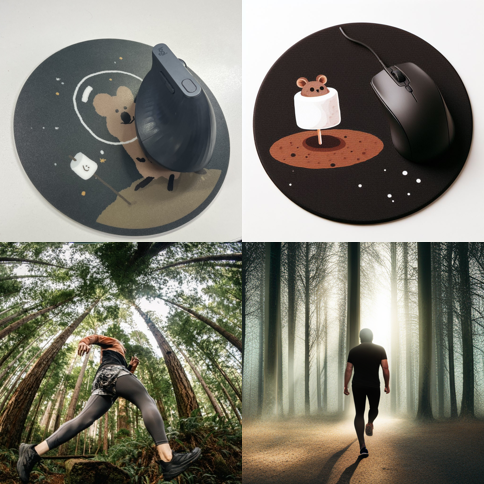

In [ ]:
image_grid([image1_given, image1_gen, image2_given, image2_gen], 2, 2)

Compute similarities between given and generated features.

In [ ]:
sim = F.cosine_similarity(feat_given, feat_gen)
print(f'The similarities between given and generated features are')
print(f'Image1: {sim[0].item():.4f}, Image2: {sim[1].item():.4f}')

The similarities between given and generated features are
Image1: 0.6216, Image2: 0.4778


# Write your TTI models and prompts

## Example)
Your model: StableDiffusion 2.0

Your prompt: A photo of a man running in the forest.

## 1st Image
> Your model :
DALL-E 3

> Your prompt:
white background, black circular mouse mat with tiny flat doodle of small brown quokka standing right side of one marshmallow skewer on brown round land, skewer smaller than quokka, quokka wearing shpere glass helmet, glass helmet represented by single circular line, black realistic vertical ergonomic computer mouse over the mat, computer mouse overlapping the body of quokka, sparse white polka dots


## 2nd Image
> Your model :

> Your prompt: